In [50]:
import numpy as np
from os import listdir
import os.path as osp
import pandas as pd

path = "data/register.xls"
labels = pd.read_excel(path)
labels

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
0,CG009,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,C
1,CG011,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
2,CG013,男,国外,外国語がうまくなる方法について,中国語,2年未満,上級,A,A
3,CG015,男,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
4,CG017,女,国外,外国語がうまくなる方法について,中国語,2年未満,中級,B,A
5,CG018,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,A
6,CG019,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,A
7,CG020,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,上級,A,A
8,CG021,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,B
9,CG022,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,B


In [51]:
from collections import Counter
a = Counter(labels.日本語レベル)
a

Counter({'初級': 31, '上級': 124, '中級': 149})

In [52]:
import numpy as np
label1 = labels.loc[labels.作文テーマ == "外国語がうまくなる方法について",:]
label1

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
0,CG009,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,C
1,CG011,女,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
2,CG013,男,国外,外国語がうまくなる方法について,中国語,2年未満,上級,A,A
3,CG015,男,国外,外国語がうまくなる方法について,中国語,2年未満,初級,B,B
4,CG017,女,国外,外国語がうまくなる方法について,中国語,2年未満,中級,B,A
5,CG018,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,A
6,CG019,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,A
7,CG020,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,上級,A,A
8,CG021,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,B
9,CG022,女,国外,外国語がうまくなる方法について,中国語,2年以上5年未満,中級,A,B


In [53]:
b = Counter(label1.日本語レベル)
b

Counter({'初級': 31, '上級': 61, '中級': 100})

In [54]:
label2 = labels.loc[labels.作文テーマ == "インターネット時代に新聞や雑誌は必要か",:]
label2

,学習者のID,学習者の性別,学習環境,作文テーマ,学習者の母語,日本語学習履歴,日本語レベル,テスト成績（文字語彙）,テスト成績（文法）
76,CG101,男,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
77,CG102,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
78,CG103,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
79,CG104,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
80,CG105,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,上級,X,X
81,CG106,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
82,CG107,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
83,CG108,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X
84,CG109,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,上級,X,X
85,CG110,女,国外,インターネット時代に新聞や雑誌は必要か,中国語,2年以上5年未満,中級,X,X


In [55]:
c = Counter(label2.日本語レベル)
c

Counter({'中級': 49, '上級': 63})

In [56]:
level_gaigo = np.array(label1.日本語レベル)
level_gaigo, len(level_gaigo)

(array(['初級', '初級', '上級', '初級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '初級', '中級', '上級', '初級', '初級', '中級', '中級',
        '初級', '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '初級', '中級',
        '中級', '上級', '中級', '中級', '初級', '初級', '中級', '上級', '中級', '上級', '中級',
        '上級', '中級', '初級', '中級', '中級', '初級', '上級', '初級', '中級', '中級', '上級',
        '初級', '初級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '上級',
        '中級', '中級', '中級', '初級', '中級', '初級', '中級', '中級', '上級', '上級', '初級',
        '上級', '中級', '中級', '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '初級', '上級', '上級', '上級', '上級', '上級',
        '中級', '中級', '中級', '中級', '初級', '中級', '中級', '初級', '中級', '中級', '中級',
        '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '中級', '中級',
        '上級', '中級', '上級', '上級', '中級', '上級', '上級', '中級', '中級', '初級', '中級',
        '中級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '中級', '上級', '上級',
        '上級', '中級', '初級', '中級', '中級', 

In [57]:
level_internet = np.array(label2.日本語レベル)
level_internet, len(level_internet)

(array(['中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '上級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '中級', '上級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級', '中級',
        '上級', '中級', '中級', '中級', '中級', '中級', '中級', '中級', '上級', '中級', '中級',
        '中級', '中級', '上級', '中級', '中級', '上級', '中級', '中級', '中級', '上級', '中級',
        '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '中級', '上級', '上級',
        '中級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '中級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級', '上級',
        '中級', '上級'], dtype=object),
 112)

In [58]:
from os import listdir
txt_path = "data/txt/"
txt_topics = listdir(txt_path)

txt_gaigo_path = txt_path + txt_topics[0]
txt_internet_path = txt_path + txt_topics[1]

txt_gaigo_files = listdir(txt_gaigo_path)
txt_internet_files = listdir(txt_internet_path)

In [59]:
# import os.path as osp
# import re
# gaigo_files = [f for f in listdir(osp.join(txt_path, txt_topics[0])) if f.endswith('.txt')]
# gaigo = []
# for gaigo_file in gaigo_files:
#     # print(gaigo_file)
#     with open(osp.join(txt_path, txt_topics[0], gaigo_file), "r", encoding="utf-8") as f:
#         lines = f.read()
#         # type(lines)
#         lines = re.sub('\n', '', lines)
#         lines = re.sub('\u3000', '', lines)
#     gaigo.append(lines)
# # type(gaigo[0])
# # gaigo[0][0]

import os.path as osp
import re
gaigo_files = [f for f in listdir(osp.join(txt_path, txt_topics[0])) if f.endswith('.txt')]
gaigo = []
for gaigo_file in gaigo_files:
    # print(gaigo_file)
    with open(osp.join(txt_path, txt_topics[0], gaigo_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # type(lines)
        lines = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", lines)
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}・［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)
        lines = lines.replace(" ", "")


    gaigo.append(lines)
# type(gaigo[0])
len(gaigo)

# 注意。注釈は削除していない。記号のみ

192

In [60]:
# import re
# internet_files = [f for f in listdir(osp.join(txt_path, txt_topics[1])) if f.endswith('.txt')]
# internet = []
# for internet_file in internet_files:
#     with open(osp.join(txt_path, txt_topics[1], internet_file), "r", encoding="utf-8") as f:
#         lines = f.read()
#         # print(lines)
#         lines = lines.strip('\ufeff□')
#         lines = re.sub('■', '', lines)
#         lines = re.sub('\n', '', lines)
#         lines = re.sub('□', '', lines)
#         lines = re.sub('\u3000', '', lines)
        
#     internet.append(lines)

# internet[0]

import re
internet_files = [f for f in listdir(osp.join(txt_path, txt_topics[1])) if f.endswith('.txt')]
internet = []
for internet_file in internet_files:
    with open(osp.join(txt_path, txt_topics[1], internet_file), "r", encoding="utf-8") as f:
        lines = f.read()
        # print(lines)
        lines = lines.strip('\ufeff□')
        lines = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", lines)
        lines = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}・［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", lines)
        lines = lines.replace(" ", "")
        
    internet.append(lines)

len(internet)

112

In [61]:
from collections import defaultdict as dd
text_tagged = dd(list)
for level, txt in zip(level_gaigo, gaigo):
    text_tagged[level].append(txt)

for level, txt in zip(level_internet, internet):
    text_tagged[level].append(txt)

text_tagged_dict = dict(text_tagged)
# text_tagged_dict
for level in text_tagged_dict.keys():
    print(len(text_tagged_dict[level]))

31
124
149


In [62]:
for level in text_tagged_dict.keys():
    text_tagged_dict[level] = "".join(text_tagged_dict[level])
        
# text_tagged_dict

In [63]:
import pickle 
# with open('text_tagged_dict2_joined.pickle', 'wb') as f:
#     pickle.dump(text_tagged_dict, f)
    
text_tagged_dict2_joined = pickle.load(open('text_tagged_dict2_joined.pickle', 'rb'))
# text_tagged_dict2_joined

In [64]:
# import matplotlib.pyplot as plt
# import numpy as np

# text_length_dist = [len(text) for level in text_tagged_dict2.keys() for text in text_tagged_dict2[level]]
# # [len(text) for text in text_tagged_dict2["初級"]]
# # text_length_dist

# # np.max(text_length_dist) = 914
# # to determine how many paddings we should add 
# plt.hist(text_length_dist, bins = np.arange(0, 1000, 10))
# plt.show()
# # we can determine the max length of texts as 1000 

In [65]:
text_tagged_dict2_joined["初級"][:10]

'私は大学日本語科の一'

In [66]:
text_tagged_joined2 = {"初級": list(), "上級": list(), "中級": list()}
text_tagged_joined2["初級"].append(text_tagged_dict2_joined["初級"])
text_len_advanced = len(text_tagged_dict2_joined["上級"])
text_len_intermediate = len(text_tagged_dict2_joined["中級"])

for i in range(5):
    text_tagged_joined2["上級"].append(text_tagged_dict2_joined["上級"][int(i * text_len_advanced / 5) : int((i + 1) * text_len_advanced / 5)])

for i in range(6):
    text_tagged_joined2["中級"].append(text_tagged_dict2_joined["中級"][int(i * text_len_intermediate / 6) : int((i + 1) * text_len_intermediate / 6)])

# text_tagged_joined2["中級"][5]
# text_tagged_dict2_joined["中級"]

In [67]:
text_len_advanced

72690

In [68]:
text_len_intermediate

84307

In [69]:
for text in text_tagged_joined2.values():
    print(len(text[0]))

13407
14538
14051


In [ ]:
from tqdm import tqdm
import spacy

nlp = spacy.load('ja_ginza')

text_vectorized = {}
for level in tqdm(text_tagged_joined2.keys()):
    text_vectorized[level] = []
    for text in text_tagged_joined2[level]:
        tokenized = nlp(text)
        for token in tokenized:
            text_vectorized[level].append(token.vector)

In [ ]:
# for i in text_vectorized.values():
#     print(len(i))

7655
41449
48524


In [ ]:
import pickle 
# with open('text_vectorized_joined.pickle', 'wb') as f:
#     pickle.dump(text_vectorized, f)
    
text_vectorized2 = pickle.load(open('text_vectorized_joined.pickle', 'rb'))
# text_vectorized2

In [ ]:
import numpy as np

window_size = 15
n_sample = 1000 # less than or equal to (len(text_vectorized2["初級"]) - window_size)


text_transformed = {}
for level, vector in text_vectorized2.items():
    text_transformed[level] = []
    start_index_list = np.random.permutation(list(range(len(text_vectorized2[level]) - window_size)))
    for i in range(n_sample):
        start_index = start_index_list[i]
        # print(start_index)
        chunks = []
        for index in range(start_index, start_index + window_size):
            chunks.append(text_vectorized2[level][index])
        text_transformed[level].append(chunks)
    text_transformed[level] = np.array(text_transformed[level])
    
# print(text_transformed)
# text_transformed["初級"]

In [ ]:
for level, value in text_transformed.items():
    print(level, value.shape)

初級 (1000, 15, 300)
上級 (1000, 15, 300)
中級 (1000, 15, 300)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import pickle 
# with open('text_transformed_window_size15_sample_size1000.pickle', 'wb') as f:
#     pickle.dump(text_transformed, f)
    
# text_transformed2 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/nlp_project/text_transformed_window_size15_sample_size1000.pickle', 'rb'))
text_transformed2 = pickle.load(open('text_transformed_window_size15_sample_size1000.pickle', 'rb'))

In [73]:
category_vectors = []
for level, vectors in text_transformed2.items():
    for vector in vectors:
        category_vectors.append((level, vector))

In [74]:
import pandas as pd

key, value = zip(*category_vectors)
data2 = pd.DataFrame({'cat': key, 'value': value})

data2.head()

,cat,value
0,初級,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,初級,"[[0.47779918, -0.290014, 0.35474735, -0.09467977, 0.06885703, 0.3252033, 0.40672505, 0.14516696, -0.31611025, 0.10430088, 0.30429342, 0.04396815, 0.03765120..."
2,初級,"[[-0.11235832, -0.04813227, -0.2808526, 0.009237373, -0.10141474, 0.2152539, -0.04496483, -0.24367486, -0.2034827, -0.09202653, 0.13513672, -0.1294869, 0.12..."
3,初級,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,初級,"[[-0.084042855, -0.03873583, 0.013529049, -0.19598125, -0.24243039, -0.071817756, 0.08944982, 0.015445012, -0.13281377, 0.015941007, -0.24492954, 0.00823402..."


In [75]:
test = data2.sample(frac=0.2, random_state=200)
train = data2.drop(test.index)

test.shape, train.shape

((600, 2), (2400, 2))

In [76]:
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data2.cat)
y_train = le.transform(train.cat).reshape(-1, 1)
ohe.fit(y_train)
y_train = ohe.transform(y_train).todense()

X_train = np.array([x for x in train.value])

X_train.shape, y_train.shape

((2400, 15, 300), (2400, 3))

In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

n_rnn = window_size = 15 # 時系列の数
batch_size = 128
epochs = 20  # epochsは、多いほど、精密に学習するが、重くなるため今回は小さくしている
n_mid = 256  # 中間層のニューロン数
data_dim = 300

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, data_dim)))
model_lstm.add(Dense(data_dim, activation="relu"))
model_lstm.add(Dense(3, activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               570368    
                                                                 
 dense (Dense)               (None, 300)               77100     
                                                                 
 dense_1 (Dense)             (None, 3)                 903       
                                                                 
Total params: 648,371
Trainable params: 648,371
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=epochs)

Epoch 1/20
75/75 [==============================] - 7s 5ms/step - loss: 1.0234 - accuracy: 0.4479
Epoch 2/20
75/75 [==============================] - 0s 4ms/step - loss: 0.9656 - accuracy: 0.4996
Epoch 3/20
75/75 [==============================] - 0s 5ms/step - loss: 0.9293 - accuracy: 0.5229
Epoch 4/20
75/75 [==============================] - 0s 4ms/step - loss: 0.9019 - accuracy: 0.5479
Epoch 5/20
75/75 [==============================] - 0s 5ms/step - loss: 0.8629 - accuracy: 0.5817
Epoch 6/20
75/75 [==============================] - 0s 5ms/step - loss: 0.8210 - accuracy: 0.5958
Epoch 7/20
75/75 [==============================] - 0s 4ms/step - loss: 0.7933 - accuracy: 0.6108
Epoch 8/20
75/75 [==============================] - 0s 4ms/step - loss: 0.7318 - accuracy: 0.6513
Epoch 9/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6725 - accuracy: 0.6858
Epoch 10/20
75/75 [==============================] - 0s 4ms/step - loss: 0.6052 - accuracy: 0.7283
Epoch 11/20
75/75 [

In [78]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

le.fit(data2.cat)
y_test = le.transform(test.cat).reshape(-1, 1)
ohe.fit(y_test)
y_test = ohe.transform(y_test).todense()

X_test = np.array([x for x in test.value])

X_test.shape, y_test.shape

((600, 15, 300), (600, 3))

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(model_lstm.predict(X_test), axis=1), np.argmax(y_test, axis=1))

19/19 [==============================] - 0s 3ms/step


0.5266666666666666

The accuracy was 50.7%. This needs fine-tuning. Possible suggestions for fine-tuning are grid

In [12]:
np.argmax(model_lstm.predict(X_test), axis=1)

19/19 [==============================] - 0s 2ms/step


array([0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2,
       1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1,
       0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0,
       0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0,

In [13]:
np.argmax(y_test, axis=1).reshape(-1)

matrix([[1, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2,
         0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2,
         0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2,
         0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1,
         0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1,
         1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
         2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2,
         1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0,
         2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 0,
         2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2,
         0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2,
         1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2,
         2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
         1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0

In [83]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
# from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, LSTM, Dropout
# from keras.optimizers import Adam, Adagrad

In [85]:
window_size = 15
n_sample = 1000 # less than or equal to (len(text_vectorized2["初級"]) - window_size)

n_rnn = window_size  # 時系列の数
batch_size = 128
epochs = 20  #epochsは、多いほど、精密に学習するが、重くなるため今回は小さくしている
n_mid = 256  # 中間層のニューロン数
data_dim = 300

input_dim = (n_rnn, data_dim)
output_dim = 3

In [79]:
def language_model(activation="relu", optimizer="adam", hidden_layer_sizes=(100, 100)):
    model = Sequential()
    firstflag = True
    for dim in hidden_layer_sizes:
        if firstflag:
            model.add(LSTM(dim, input_shape=(n_rnn, data_dim), return_sequences=True, activation=activation))
            model.add(Dropout(0.2))
            firstflag = False
        else:
            model.add(LSTM(dim, return_sequences=True, activation=activation))
            model.add(Dropout(0.2))

    model.add(LSTM(n_mid, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [19]:
# activation = ["relu", "tanh"]
optimizer = ["adam", "adagrad", "sgd", "RMSprop", "Adamax"]
hidden_layer_sizes = [(50, 50, 50, 50), (50, 50, 50), (50, 50), (50, ) ]
nb_epoch = [20, 25]
batch_size = [128, 256]

In [ ]:
model2 = KerasClassifier(build_fn=language_model, verbose=0)
param_grid = dict(activation=activation, 
                  optimizer=optimizer, 
                  hidden_layer_sizes=hidden_layer_sizes, 
                  nb_epoch=nb_epoch, 
                  batch_size=batch_size,)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, verbose=2)


<ipython-input-19-c64ef7c3159e>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=language_model, verbose=0)


In [ ]:
grid_result = grid.fit(X_train, y_train)

[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.2s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.5s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.5s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.2s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.2s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.5s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   5.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   6.2s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   5.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   6.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   5.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.9s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   6.2s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   4.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   4.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   5.1s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   5.1s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   4.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   4.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   4.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   4.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   6.0s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   4.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   5.0s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   3.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   3.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   3.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   3.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   3.2s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   3.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.0s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.0s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   3.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   3.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   3.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   3.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   3.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   3.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   3.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   3.9s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   3.5s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   3.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   3.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   3.0s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   2.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   2.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   2.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   2.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   2.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   2.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   3.0s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   2.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   2.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   2.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   2.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   2.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   2.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.3s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.7s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   2.5s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   3.0s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   2.6s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   2.5s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   2.8s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   2.5s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   2.4s


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   2.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   7.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   7.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   6.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   7.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   7.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   8.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   7.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   8.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   7.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   6.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   7.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   6.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   7.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   8.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   9.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   7.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   8.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   8.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   8.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   6.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adam; total time=   6.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adam; total time=   8.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adam; total time=   7.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adam; total time=   8.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adam; total time=   8.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   7.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   6.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   7.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   6.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   8.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   7.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   6.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   7.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   8.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   7.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   7.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   8.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   8.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   7.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   7.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   5.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   5.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   6.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adam; total time=   5.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   5.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   5.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   5.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   6.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   5.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   5.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   6.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   5.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   6.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   5.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   8.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=RMSprop; total time=   6.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   5.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   5.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   5.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   5.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=20, optimizer=Adamax; total time=   6.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   5.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   6.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   5.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adam; total time=   5.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   6.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   6.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=sgd; total time=   5.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   6.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   6.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   6.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   6.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=RMSprop; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   6.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50, 50), nb_epoch=25, optimizer=Adamax; total time=   6.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   4.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   4.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   5.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adam; total time=   5.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   5.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   5.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=adagrad; total time=   4.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   4.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   4.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=sgd; total time=   5.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   5.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   5.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=RMSprop; total time=   4.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   5.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=20, optimizer=Adamax; total time=   4.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   4.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adam; total time=   4.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   4.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=adagrad; total time=   5.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   4.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   4.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   4.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=sgd; total time=   4.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   4.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   4.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   4.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   4.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=RMSprop; total time=   5.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.8s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   5.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50, 50), nb_epoch=25, optimizer=Adamax; total time=   4.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   3.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   3.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adam; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   4.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   3.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=adagrad; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=sgd; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   3.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   3.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   3.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   3.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=RMSprop; total time=   3.6s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   3.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=20, optimizer=Adamax; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   3.5s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adam; total time=   3.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   3.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=adagrad; total time=   3.0s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   2.9s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=sgd; total time=   3.3s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   3.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   3.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   3.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   3.7s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=RMSprop; total time=   3.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   3.1s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   3.4s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   3.2s


[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   3.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(50,), nb_epoch=25, optimizer=Adamax; total time=   3.4s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.7s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.3s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   9.2s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.3s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=  10.1s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   8.6s

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([4.94819379, 4.92124991, 4.98324423, 5.22386875, 4.77248521,
        4.75072613, 4.67256632, 4.61011233, 5.24086461, 5.00736651,
        3.94882131, 3.89164729, 3.84395447, 4.23850641, 3.9753469 ,
        3.9534544 , 3.8687252 , 3.82825971, 4.40876946, 3.92900877,
        3.07817745, 2.99073162, 2.89260201, 3.29045901, 2.98132415,
        2.92830539, 2.96136379, 2.99288259, 3.13214078, 3.16562767,
        2.18534522, 2.10531325, 2.11448932, 2.29335666, 2.02930427,
        2.20381064, 2.12618113, 2.05535188, 2.27125916, 2.11817064,
        6.9550415 , 6.73892193, 6.47470922, 7.32712417, 7.14411292,
        7.08559074, 6.32410965, 6.71722054, 6.97709999, 7.10189133,
        5.12124715, 5.1014461 , 5.15415907, 5.84869766, 5.11562009,
        5.02660708, 5.0588623 , 5.14128861, 5.63733301, 5.30480008,
        4.36234236, 4.33965964, 4.05626006, 4.34725108, 3.93282399,
        4.23629298, 4.13673615, 4.04082627, 4.35143161, 4.23468914,
        2.75466423, 2.89158816,

In [ ]:
mask = grid_result.cv_results_['std_test_score'] < 0.1
np.argmax(grid_result.cv_results_['mean_test_score'][mask])

79

In [ ]:
sorted(grid_result.cv_results_['mean_test_score'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00041666668839752675,
 0.00041666668839752675,
 0.0008333333767950535,
 0.0008333333767950535,
 0.0008333333767950535,
 0.0012500000186264515,
 0.001666666753590107,
 0.002500000037252903,
 0.002500000037252903,
 0.00416666679084301,
 0.004166666883975267,
 0.004583333525806666,
 0.005000000074505806,
 0.005416666716337204,
 0.005833333358168602,
 0.006666667014360428,
 0.007083333563059568,
 0.011666666716337204,
 0.013333332957699895,
 0.013333333656191826,
 0.013333334028720856,
 0.013333334028720856,
 0.013750000577419996,
 0.01416666698642075,
 0.015000000596046448,
 0.01666666609235108,
 0.017916665971279146,
 0.018333333404734732,
 0.019583333749324083,
 0.0199999999254

In [ ]:
params

{'activation': 'tanh',
 'batch_size': 128,
 'hidden_layer_sizes': (50, 50),
 'nb_epoch': 20,
 'optimizer': 'adam'}

In [ ]:
import pickle 
with open('/content/drive/MyDrive/Colab Notebooks/nlp_project/grid_result_best_params1.pickle', 'wb') as f:
    pickle.dump(grid_result.best_params_, f)
    
# text_transformed2 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/nlp_project/text_transformed_window_size15_sample_size1000.pickle', 'rb'))

In [ ]:
model2 = language_model(activation=grid_result.best_params_['activation'], 
                   optimizer=grid_result.best_params_['optimizer'], 
                   hidden_layer_sizes=grid_result.best_params_['hidden_layer_sizes'])

model2.fit(X_train, y_train, epochs=grid_result.best_params_['nb_epoch'], batch_size=grid_result.best_params_['batch_size'])

Epoch 1/20
10/10 [==============================] - 3s 19ms/step - loss: 1.1005 - accuracy: 0.3179
Epoch 2/20
10/10 [==============================] - 0s 15ms/step - loss: 1.0997 - accuracy: 0.3196
Epoch 3/20
10/10 [==============================] - 0s 13ms/step - loss: 1.1007 - accuracy: 0.3142
Epoch 4/20
10/10 [==============================] - 0s 12ms/step - loss: 1.0998 - accuracy: 0.3271
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 1.0988 - accuracy: 0.3425
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 1.0994 - accuracy: 0.3212
Epoch 7/20
10/10 [==============================] - 0s 13ms/step - loss: 1.0993 - accuracy: 0.3317
Epoch 8/20
10/10 [==============================] - 0s 12ms/step - loss: 1.0989 - accuracy: 0.3283
Epoch 9/20
10/10 [==============================] - 0s 12ms/step - loss: 1.0986 - accuracy: 0.3363
Epoch 10/20
10/10 [==============================] - 0s 12ms/step - loss: 1.0991 - accuracy: 0.3329
Epoch 11/

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(model2.predict(X_test), axis=1), np.argmax(y_test, axis=1))

19/19 [==============================] - 1s 4ms/step


0.3466666666666667

In [ ]:
model2.predict(X_test)

19/19 [==============================] - 0s 6ms/step


array([[0.32899114, 0.34335256, 0.32765627],
       [0.32988042, 0.3293508 , 0.34076878],
       [0.3271588 , 0.34085882, 0.33198237],
       ...,
       [0.32931495, 0.34006554, 0.3306195 ],
       [0.3329972 , 0.3345674 , 0.3324354 ],
       [0.32666722, 0.33503953, 0.33829325]], dtype=float32)

In [ ]:
# for early stopping
# https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf

# stacked lstm model example
# https://machinelearningknowledge.ai/keras-lstm-layer-explained-for-beginners-with-example/

# lstm layer documentation
# https://keras.io/api/layers/recurrent_layers/lstm/

# Should you use relu for activation in lstm
# https://stats.stackexchange.com/questions/444923/activation-function-between-lstm-layers

# lstm explained
# https://qiita.com/t_Signull/items/21b82be280b46f467d1b

# stacked lstm explained
# https://machinelearningmastery.com/stacked-long-short-term-memory-networks/

# error solved
# https://stackoverflow.com/questions/58119320/valueerror-input-0-of-layer-lstm-is-incompatible-with-the-layer-expected-ndim

In [ ]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 / 60 / 60 "h)"}'

0.0836329days (2.00719h)


In [ ]:
params = {'activation': 'tanh',
 'batch_size': 128,
 'hidden_layer_sizes': (50, 50),
 'nb_epoch': 20,
 'optimizer': 'adam'}

In [ ]:
model3 = language_model(activation=params['activation'], 
                   optimizer=params['optimizer'], 
                   hidden_layer_sizes=params['hidden_layer_sizes'])

model3.fit(X_train, y_train, epochs=params['nb_epoch'], batch_size=params['batch_size'])

Epoch 1/20
19/19 [==============================] - 5s 18ms/step - loss: 1.0728 - accuracy: 0.4187
Epoch 2/20
19/19 [==============================] - 0s 12ms/step - loss: 1.0115 - accuracy: 0.4529
Epoch 3/20
19/19 [==============================] - 0s 11ms/step - loss: 0.9750 - accuracy: 0.5071
Epoch 4/20
19/19 [==============================] - 0s 11ms/step - loss: 0.9525 - accuracy: 0.5121
Epoch 5/20
19/19 [==============================] - 0s 11ms/step - loss: 0.9291 - accuracy: 0.5221
Epoch 6/20
19/19 [==============================] - 0s 12ms/step - loss: 0.9039 - accuracy: 0.5412
Epoch 7/20
19/19 [==============================] - 0s 11ms/step - loss: 0.9035 - accuracy: 0.5442
Epoch 8/20
19/19 [==============================] - 0s 11ms/step - loss: 0.8892 - accuracy: 0.5592
Epoch 9/20
19/19 [==============================] - 0s 11ms/step - loss: 0.9078 - accuracy: 0.5521
Epoch 10/20
19/19 [==============================] - 0s 11ms/step - loss: 0.8461 - accuracy: 0.5800
Epoch 11/

In [ ]:
accuracy_score(np.argmax(model3.predict(X_test), axis=1), np.argmax(y_test, axis=1))

19/19 [==============================] - 1s 4ms/step


0.5466666666666666

In [ ]:
model3.predict(X_test)

19/19 [==============================] - 0s 5ms/step


array([[5.3287083e-01, 4.6697378e-01, 1.5539600e-04],
       [3.9313397e-01, 4.1999364e-01, 1.8687238e-01],
       [4.2869858e-02, 3.6385888e-01, 5.9327132e-01],
       ...,
       [4.5412302e-04, 2.6838525e-04, 9.9927753e-01],
       [7.0622128e-01, 2.9362595e-01, 1.5275500e-04],
       [6.4372247e-01, 3.5624692e-01, 3.0594765e-05]], dtype=float32)

In [16]:
def language_model2(optimizer="adam", hidden_layer_sizes=(100, 100)):
    model = Sequential()
    firstflag = True
    for dim in hidden_layer_sizes:
        if firstflag:
            model.add(LSTM(dim, input_shape=(n_rnn, data_dim), return_sequences=True))
            firstflag = False
        else:
            model.add(LSTM(dim, return_sequences=True))
            # model.add(Dropout(0.2))

    model.add(LSTM(n_mid))
    model.add(Dense(output_dim, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [20]:
model5 = KerasClassifier(build_fn=language_model2, verbose=0)
param_grid2 = dict(optimizer=optimizer, 
                  hidden_layer_sizes=hidden_layer_sizes, 
                  nb_epoch=nb_epoch, 
                  batch_size=batch_size,)
grid3 = GridSearchCV(estimator=model5, param_grid=param_grid2, verbose=2)


<ipython-input-20-c76952355f90>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model5 = KerasClassifier(build_fn=language_model2, verbose=0)


In [21]:
grid3_result = grid3.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.7s
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.8s
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   9.2s
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.6s
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   8.9s
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   8.5s
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   8.7s
[CV] END batch_size=128, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   8.8s
[CV] END batch_size=128, hidden_layer_sizes=(50, 

[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   9.4s


[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   9.6s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adam; total time=   9.2s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   9.7s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   9.5s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   9.4s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   9.1s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=adagrad; total time=   9.8s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   9.5s
[CV] END batch_size=256, hidden_layer_sizes=(50, 50, 50, 50), nb_epoch=20, optimizer=sgd; total time=   9.

In [22]:
grid3_result.best_params_

{'batch_size': 256,
 'hidden_layer_sizes': (50, 50),
 'nb_epoch': 20,
 'optimizer': 'adagrad'}

In [28]:
grid3_result.best_score_

0.4762499988079071

In [29]:
grid3_result.cv_results_['mean_test_score']

array([7.91666657e-03, 8.33333377e-04, 0.00000000e+00, 1.25000000e-02,
       0.00000000e+00, 3.04166679e-02, 2.91666668e-03, 0.00000000e+00,
       4.83333319e-02, 6.25000000e-03, 5.83333351e-02, 5.12499996e-02,
       0.00000000e+00, 6.62500024e-02, 6.00000028e-02, 4.33333345e-02,
       4.16666688e-04, 0.00000000e+00, 5.66666675e-02, 0.00000000e+00,
       4.33333337e-02, 1.20833334e-02, 8.33333377e-04, 1.37500000e-01,
       4.62500006e-02, 5.87499991e-02, 9.20833319e-02, 8.33333377e-04,
       1.58333331e-02, 3.66666675e-02, 3.24999992e-02, 1.53750001e-01,
       4.58333353e-03, 4.54166675e-02, 5.00000000e-02, 8.62500012e-02,
       2.09166671e-01, 0.00000000e+00, 7.62499988e-02, 5.75000003e-02,
       2.08333340e-03, 3.16666679e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.33333328e-02, 0.00000000e+00,
       5.87499976e-02, 0.00000000e+00, 0.00000000e+00, 1.22916671e-01,
       8.33333377e-04, 7.08333328e-03, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
import pickle



In [27]:
import numpy as np
grid3_result.cv_results_['mean_test_score'][np.argmin(grid3_result.cv_results_['rank_test_score'])]

0.4762499988079071

In [31]:
model6 = language_model2(optimizer=grid3_result.best_params_['optimizer'], 
                   hidden_layer_sizes=grid3_result.best_params_['hidden_layer_sizes'])

model6.fit(X_train, y_train, epochs=grid3_result.best_params_['nb_epoch'], batch_size=grid3_result.best_params_['batch_size'])

Epoch 1/20
10/10 [==============================] - 4s 15ms/step - loss: 1.0984 - accuracy: 0.3400
Epoch 2/20
10/10 [==============================] - 0s 14ms/step - loss: 1.0984 - accuracy: 0.3408
Epoch 3/20
10/10 [==============================] - 0s 12ms/step - loss: 1.0983 - accuracy: 0.3433
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 1.0983 - accuracy: 0.3421
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 1.0983 - accuracy: 0.3433
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 1.0983 - accuracy: 0.3433
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 1.0983 - accuracy: 0.3433
Epoch 8/20
10/10 [==============================] - 0s 10ms/step - loss: 1.0983 - accuracy: 0.3438
Epoch 9/20
10/10 [==============================] - 0s 10ms/step - loss: 1.0983 - accuracy: 0.3454
Epoch 10/20
10/10 [==============================] - 0s 11ms/step - loss: 1.0983 - accuracy: 0.3425
Epoch 11/

In [32]:
accuracy_score(np.argmax(model6.predict(X_test), axis=1), np.argmax(y_test, axis=1))

19/19 [==============================] - 1s 4ms/step


0.33166666666666667

In [ ]:
model6.predict(X_test)

19/19 [==============================] - 0s 17ms/step


array([[8.02448750e-01, 1.97545916e-01, 5.38991071e-06],
       [4.49187368e-01, 4.51720476e-01, 9.90922004e-02],
       [1.68219313e-01, 2.58350998e-01, 5.73429704e-01],
       ...,
       [8.77957284e-01, 1.21951364e-01, 9.13981567e-05],
       [8.25690866e-01, 1.74283981e-01, 2.52116788e-05],
       [7.93215096e-01, 2.06522450e-01, 2.62525835e-04]], dtype=float32)

In [ ]:
result

In [2]:
import pickle
grid_cv_result = pickle.load(open('gridcv_result.pickle', 'rb'))

In [19]:
mean_score

array([0.21206349, 0.21666667, 0.08333333, 0.35555555, 0.33428572,
       0.16111111, 0.18333333, 0.11666666, 0.56111111, 0.33666667,
       0.33888889, 0.2115873 , 0.08333333, 0.23333333, 0.34444444,
       0.30777778, 0.28507937, 0.08333333, 0.11666666, 0.41666666,
       0.26666667, 0.14460317, 0.28333333, 0.30555556, 0.32222222,
       0.27777779, 0.18333333, 0.08333333, 0.23333334, 0.15000001,
       0.13333334, 0.22777778, 0.08888889, 0.10555556, 0.32222223,
       0.22777778, 0.11126985, 0.08333333, 0.23333333, 0.20015873,
       0.26714285, 0.10158731, 0.11666666, 0.43714286, 0.27222221,
       0.47555556, 0.38936508, 0.08333333, 0.19444444, 0.26666667,
       0.38349206, 0.40761905, 0.11666666, 0.11111111, 0.31666666,
       0.07777778, 0.41507937, 0.08333333, 0.11666666, 0.46666666,
       0.40809523, 0.23349206, 0.38333333, 0.15555555, 0.32253969,
       0.35571429, 0.17809524, 0.22222222, 0.14507936, 0.20555556,
       0.04444445, 0.1447619 , 0.08888889, 0.50555555, 0.42333

In [17]:
import numpy as np
mean_score = np.array(grid_cv_result["mean_test_score"])
mean_score_rank = mean_score.argsort()
mean_score_rank

array([ 70,  55,  80, 130, 128,  37, 158, 125, 123,  92, 114,  47,  77,
       112, 110, 109,  57, 108, 107,  98, 103, 102,  99, 100, 133,  27,
        90, 135,   2, 155, 153,  88,  87,  93,  85, 150,  84,  12, 149,
        95, 148, 145, 144, 129,  82, 138, 139,  17, 140,  83,  72,  32,
       118, 142, 127,  41, 105,  33,  53,  36,   7, 111,  52,  18,  42,
        58,  97, 157,  30, 104, 159,  21,  71,  68,  29,  63,   5,  66,
       137, 152, 115,  26,   6,  48,  75, 113, 151,  76,  39,  69,  11,
         0,  91,   1,  67,  35,  31,  38,  13,  28,  61, 101,  49,  20,
        40,  44, 154, 117,  25,  22, 143, 147, 119, 134,  89,  78, 106,
        16,  96, 146,  23,  15,  94, 124, 141,  54, 156,  79,  24,  34,
        64,   4,   9,  10,  14, 121,  81,   3,  65,  62, 116,  50,  46,
       132,  86,  51,  60,  56,  19,  74, 131,  43,  59,  45, 126, 122,
        73, 120,   8, 136], dtype=int64)

In [20]:
np.where(mean_score_rank < 10)

(array([ 28,  60,  76,  82,  91,  93, 131, 132, 137, 158], dtype=int64),)

In [13]:
std_score = np.array(grid_cv_result["std_test_score"])
std_score_rank = std_score.argsort()

array([ 70,  36,  41,  74,  55,   6, 105, 118, 142,  72,  21, 157,  47,
       112, 109, 114, 108, 107, 103, 123, 102, 110,  99, 100,  82,  98,
        95,  93,  92,  90,  88,  87,  77,  85, 158,  80,  84,  57, 125,
        83, 144, 139, 138, 148, 149, 135, 133, 150, 140, 153, 145, 130,
       129, 128, 155,   2,  12,  37,  27,  17,  30,  71,   5,  32,  38,
        61,  45,  25,  65, 127,  40,  29,  66,  53,   1,  16,   0,  33,
       101,  34,  20,  75,  63,  24,  79,  39, 137, 115, 152,  11,  46,
        42, 111,  52,  58,  97,  18,   7,  68,  76, 151, 113,  48,  67,
         4,  13,  64,  91,  15,   9, 104,  14,  54, 159,  26,  28,  10,
        31,  35,  69,  49, 131,  56, 154,  19,  50,   3, 156,  62, 136,
        44,  43,  51,  60, 116, 117, 121,   8, 143, 147,  78, 119, 134,
        89, 106,  22,  23, 146,  96,  59,  94, 141, 124,  73,  81, 120,
       126, 122, 132,  86], dtype=int64)

In [21]:
import pandas as pd
df = pd.DataFrame(grid_cv_result)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_hidden_layer_sizes,param_nb_epoch,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.461793,0.097312,0.137249,0.006131,relu,5,"(50, 50, 50, 50)",10,adam,"{'activation': 'relu', 'batch_size': 5, 'hidde...",0.027778,0.000000,0.583333,0.277778,0.171429,0.212063,0.211065,69
1,0.391384,0.014835,0.185101,0.090780,relu,5,"(50, 50, 50, 50)",10,adagrad,"{'activation': 'relu', 'batch_size': 5, 'hidde...",0.055556,0.361111,0.555556,0.111111,0.000000,0.216667,0.209644,67
2,0.414888,0.090011,0.134258,0.005419,relu,5,"(50, 50, 50, 50)",10,sgd,"{'activation': 'relu', 'batch_size': 5, 'hidde...",0.000000,0.000000,0.416667,0.000000,0.000000,0.083333,0.166667,111
3,0.605624,0.075675,0.131512,0.006313,relu,5,"(50, 50, 50, 50)",10,RMSprop,"{'activation': 'relu', 'batch_size': 5, 'hidde...",0.361111,0.000000,0.416667,1.000000,0.000000,0.355556,0.366582,23
4,0.441564,0.074478,0.127249,0.006882,relu,5,"(50, 50, 50, 50)",10,Adamax,"{'activation': 'relu', 'batch_size': 5, 'hidde...",0.000000,0.722222,0.555556,0.222222,0.171429,0.334286,0.264682,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.333192,0.015942,0.132204,0.010513,sigmoid,10,"(50,)",25,adam,"{'activation': 'sigmoid', 'batch_size': 10, 'h...",0.000000,0.000000,0.416667,0.000000,0.000000,0.083333,0.166667,111
156,0.311577,0.036243,0.174430,0.094056,sigmoid,10,"(50,)",25,adagrad,"{'activation': 'sigmoid', 'batch_size': 10, 'h...",0.000000,1.000000,0.388889,0.000000,0.200000,0.317778,0.370492,34
157,0.345889,0.103304,0.130649,0.004031,sigmoid,10,"(50,)",25,sgd,"{'activation': 'sigmoid', 'batch_size': 10, 'h...",0.000000,0.000000,0.416667,0.000000,0.200000,0.123333,0.165865,93
158,0.395710,0.039170,0.128640,0.006577,sigmoid,10,"(50,)",25,RMSprop,"{'activation': 'sigmoid', 'batch_size': 10, 'h...",0.000000,0.000000,0.416667,0.000000,0.000000,0.083333,0.166667,111


In [40]:
sdf = df.sort_values("mean_test_score", ascending=False)

In [46]:
pd.options.display.max_colwidth=160
pd.options.display.min_rows=20
sdf[["mean_test_score", "std_test_score", "params"]]

,mean_test_score,std_test_score,params
136,0.616667,0.371184,"{'activation': 'sigmoid', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50), 'nb_epoch': 25, 'optimizer': 'adagrad'}"
8,0.561111,0.392208,"{'activation': 'relu', 'batch_size': 5, 'hidden_layer_sizes': (50, 50, 50, 50), 'nb_epoch': 25, 'optimizer': 'RMSprop'}"
120,0.516667,0.448454,"{'activation': 'sigmoid', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50, 50), 'nb_epoch': 10, 'optimizer': 'adam'}"
73,0.505556,0.414773,"{'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': (50,), 'nb_epoch': 10, 'optimizer': 'RMSprop'}"
122,0.483333,0.448454,"{'activation': 'sigmoid', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50, 50), 'nb_epoch': 10, 'optimizer': 'sgd'}"
126,0.483333,0.448454,"{'activation': 'sigmoid', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50, 50), 'nb_epoch': 25, 'optimizer': 'adagrad'}"
45,0.475556,0.190471,"{'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50, 50), 'nb_epoch': 25, 'optimizer': 'adam'}"
59,0.466667,0.408777,"{'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50), 'nb_epoch': 25, 'optimizer': 'Adamax'}"
43,0.437143,0.372905,"{'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50, 50), 'nb_epoch': 10, 'optimizer': 'RMSprop'}"
131,0.433333,0.330824,"{'activation': 'sigmoid', 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50), 'nb_epoch': 10, 'optimizer': 'adagrad'}"


In [91]:
params = sdf[["mean_test_score", "std_test_score", "params"]].params[0]

In [86]:
model10 = language_model(activation=params['activation'], 
                   optimizer=params['optimizer'], 
                   hidden_layer_sizes=params['hidden_layer_sizes'])

model10.fit(X_train, y_train, epochs=params['nb_epoch'], batch_size=params['batch_size'])

Epoch 1/10
480/480 [==============================] - 12s 16ms/step - loss: 1.1132 - accuracy: 0.3379
Epoch 2/10
480/480 [==============================] - 8s 17ms/step - loss: 1.1565 - accuracy: 0.3446
Epoch 3/10
480/480 [==============================] - 8s 17ms/step - loss: 1.0663 - accuracy: 0.4121
Epoch 4/10
480/480 [==============================] - 8s 17ms/step - loss: 1.1270 - accuracy: 0.4596
Epoch 5/10
480/480 [==============================] - 8s 17ms/step - loss: 0.9957 - accuracy: 0.4871
Epoch 6/10
480/480 [==============================] - 8s 17ms/step - loss: 0.9533 - accuracy: 0.5192
Epoch 7/10
480/480 [==============================] - 8s 16ms/step - loss: 0.9304 - accuracy: 0.5333
Epoch 8/10
480/480 [==============================] - 8s 16ms/step - loss: 0.8945 - accuracy: 0.5471
Epoch 9/10
480/480 [==============================] - 8s 16ms/step - loss: 0.8575 - accuracy: 0.5671
Epoch 10/10
480/480 [==============================] - 8s 16ms/step - loss: 0.8255 - accur

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(model10.predict(X_test), axis=1), np.argmax(y_test, axis=1))

19/19 [==============================] - 1s 18ms/step


0.5416666666666666

In [ ]:
model11 = language_model(activation=params2['activation'], 
                   optimizer=params2['optimizer'], 
                   hidden_layer_sizes=params2['hidden_layer_sizes'])

model11.fit(X_train, y_train, epochs=params2['nb_epoch'], batch_size=params2['batch_size'])

In [90]:
for i in range(10):
    params = sdf[["mean_test_score", "std_test_score", "params"]].params[i]
    
    model = language_model(activation=params['activation'], 
                   optimizer=params['optimizer'], 
                   hidden_layer_sizes=params['hidden_layer_sizes'])

    model.fit(X_train, y_train, epochs=params['nb_epoch'], batch_size=params['batch_size'])
    
    print("{}: {}".format(i, accuracy_score(np.argmax(model.predict(X_test), axis=1), np.argmax(y_test, axis=1))))

Epoch 1/10
480/480 [==============================] - 10s 16ms/step - loss: 1.1249 - accuracy: 0.3600
Epoch 2/10
480/480 [==============================] - 8s 16ms/step - loss: 1.0069 - accuracy: 0.4792
Epoch 3/10
480/480 [==============================] - 8s 17ms/step - loss: 0.9949 - accuracy: 0.5021
Epoch 4/10
480/480 [==============================] - 8s 16ms/step - loss: 0.9360 - accuracy: 0.5221
Epoch 5/10
480/480 [==============================] - 8s 16ms/step - loss: 0.9115 - accuracy: 0.5283
Epoch 6/10
480/480 [==============================] - 8s 16ms/step - loss: 0.8741 - accuracy: 0.5521
Epoch 7/10
480/480 [==============================] - 8s 16ms/step - loss: 0.8290 - accuracy: 0.5767
Epoch 8/10
480/480 [==============================] - 8s 16ms/step - loss: 0.7977 - accuracy: 0.5854
Epoch 9/10
480/480 [==============================] - 8s 16ms/step - loss: 0.7677 - accuracy: 0.5983
Epoch 10/10
19/19 [==============================] - 1s 16ms/step
0: 0.5383333333333333
Ep

KeyboardInterrupt: 

In [95]:
model112 = language_model(activation=params['activation'], 
                   optimizer=params['optimizer'], 
                   hidden_layer_sizes=params['hidden_layer_sizes'])

model112.fit(X_train, y_train, epochs=params['nb_epoch'], batch_size=params['batch_size'])

Epoch 1/10
480/480 [==============================] - 18s 32ms/step - loss: 1.1172 - accuracy: 0.3487
Epoch 2/10
480/480 [==============================] - 16s 32ms/step - loss: 1.0453 - accuracy: 0.4529
Epoch 3/10
480/480 [==============================] - 16s 32ms/step - loss: 0.9904 - accuracy: 0.4958
Epoch 4/10
480/480 [==============================] - 15s 32ms/step - loss: 0.9472 - accuracy: 0.5188
Epoch 5/10
480/480 [==============================] - 16s 32ms/step - loss: 0.9039 - accuracy: 0.5412
Epoch 6/10
480/480 [==============================] - 16s 33ms/step - loss: 0.8700 - accuracy: 0.5663
Epoch 7/10
480/480 [==============================] - 16s 34ms/step - loss: 0.8365 - accuracy: 0.5758
Epoch 8/10
480/480 [==============================] - 16s 33ms/step - loss: 0.8708 - accuracy: 0.5608
Epoch 9/10
480/480 [==============================] - 16s 34ms/step - loss: 0.8235 - accuracy: 0.5829
Epoch 10/10
480/480 [==============================] - 16s 33ms/step - loss: 0.763

In [97]:
pred_y = np.argmax(model112.predict(X_test), axis=1)
test_y = np.argmax(y_test, axis=1)

19/19 [==============================] - 1s 27ms/step


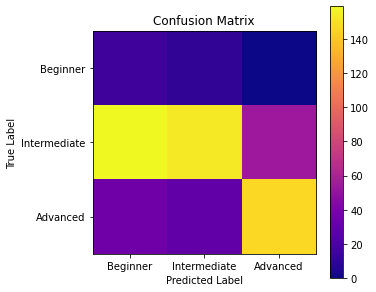

array([[ 15,  10,   0],
       [159, 153,  54],
       [ 34,  28, 147]], dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(pred_y, test_y)
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap='plasma')
plt.colorbar()
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(np.arange(3), ["Beginner", "Intermediate", "Advanced"])
plt.yticks(np.arange(3), ["Beginner", "Intermediate", "Advanced"])

plt.show()
cm

In [101]:
data3 = data2[data2["cat"] != "上級"]

In [102]:
test2 = data3.sample(frac=0.2, random_state=200)
train2 = data3.drop(test2.index)

test2.shape, train2.shape

((400, 2), (1600, 2))

In [103]:
from sklearn import preprocessing
import numpy as np

le2 = preprocessing.LabelEncoder()
ohe2 = preprocessing.OneHotEncoder()

le2.fit(data3.cat)
y_train2 = le2.transform(train2.cat).reshape(-1, 1)
ohe2.fit(y_train2)
y_train2 = ohe2.transform(y_train2).todense()

X_train2 = np.array([x for x in train2.value])

X_train2.shape, y_train2.shape

((1600, 15, 300), (1600, 2))

In [104]:
le2 = preprocessing.LabelEncoder()
ohe2 = preprocessing.OneHotEncoder()

le2.fit(data3.cat)
y_test2 = le2.transform(test2.cat).reshape(-1, 1)
ohe2.fit(y_test2)
y_test2 = ohe2.transform(y_test2).todense()

X_test2 = np.array([x for x in test2.value])

X_test2.shape, y_test2.shape

((400, 15, 300), (400, 2))

In [111]:
output_dim = 2

In [112]:
model112 = language_model(activation=params['activation'], 
                   optimizer=params['optimizer'], 
                   hidden_layer_sizes=params['hidden_layer_sizes'])

model112.fit(X_train2, y_train2, epochs=params['nb_epoch'], batch_size=params['batch_size'])

Epoch 1/10
320/320 [==============================] - 10s 22ms/step - loss: 0.6736 - accuracy: 0.5462
Epoch 2/10
320/320 [==============================] - 7s 22ms/step - loss: 0.8589 - accuracy: 0.5612
Epoch 3/10
320/320 [==============================] - 7s 22ms/step - loss: 0.6865 - accuracy: 0.5919
Epoch 4/10
320/320 [==============================] - 7s 23ms/step - loss: 1.9573 - accuracy: 0.5406
Epoch 5/10
320/320 [==============================] - 7s 22ms/step - loss: 0.6883 - accuracy: 0.5831
Epoch 6/10
320/320 [==============================] - 7s 22ms/step - loss: 0.6867 - accuracy: 0.6212
Epoch 7/10
320/320 [==============================] - 7s 22ms/step - loss: 0.6093 - accuracy: 0.6506
Epoch 8/10
320/320 [==============================] - 7s 23ms/step - loss: 0.5849 - accuracy: 0.6725
Epoch 9/10
320/320 [==============================] - 7s 22ms/step - loss: 0.5488 - accuracy: 0.6994
Epoch 10/10
320/320 [==============================] - 8s 24ms/step - loss: 0.5610 - accur

In [114]:
pred_y2 = np.argmax(model112.predict(X_test2), axis=1)
test_y2 = np.argmax(y_test2, axis=1)

13/13 [==============================] - 1s 20ms/step


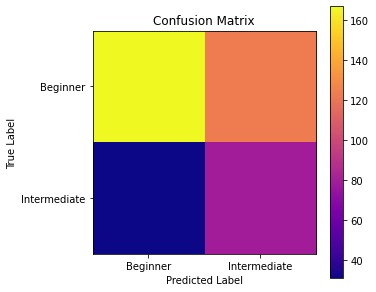

array([[167, 123],
       [ 31,  79]], dtype=int64)

In [115]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(pred_y2, test_y2)
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap='plasma')
plt.colorbar()
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(np.arange(2), ["Beginner", "Intermediate"])
plt.yticks(np.arange(2), ["Beginner", "Intermediate"])

plt.show()
cm

In [127]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.metrics import roc_curve  

def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

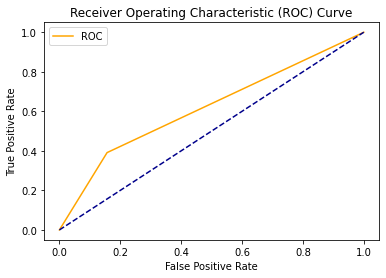

In [131]:
fper, tper, thresholds = roc_curve(test_y2, pred_y2) 
plot_roc_cur(fper, tper)